In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [1]:
#from sklearnex import patch_sklearn
#patch_sklearn()
import pandas as pd
from sklearn import decomposition
from sklearn import mixture

from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
from sklearn.model_selection import train_test_split
from kmodes.kprototypes import KPrototypes
#from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import OrdinalEncoder
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score, make_scorer
#from sklearn.neural_network import MLPClassifier

from sklearn.cluster import KMeans
####clean up data set 1: the adult earning prediction dataset 

data_1=pd.read_csv('adult.data', header=None, names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','50K'], sep=',\s', na_values=["?"])
data_2=pd.read_csv('adult.test', header=None, names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','50K'], sep=',\s', na_values=["?"])

adult_df = pd.concat([data_1,data_2])

###clean all missing data, just delect all of those 
adult_df.replace(' ?',np.NaN,inplace=True)
adult_df=adult_df.dropna()
adult_df.replace('>50K.', '>',inplace=True)
adult_df.replace('<=50K.', '<=',inplace=True)
adult_df.replace('>50K', '>',inplace=True)
adult_df.replace('<=50K', '<=',inplace=True)

##normalize

adult_label_col =['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
adult_df[adult_label_col] = adult_df[adult_label_col].astype('category')
adult_df[adult_label_col] = adult_df[adult_label_col].apply(lambda x: x.cat.codes)

scaler = StandardScaler(with_mean=True,with_std=True)
num_label = ['age','education-num','capital-gain','capital-loss','hours-per-week']
X_adult_cat = adult_df[num_label] 
#all_label =list(adult_df)
#all_label.remove('50K')
adult_df[num_label] = scaler.fit_transform(adult_df[num_label] )
#print(adult_df['hours-per-week'].std())
X_adult, y_adult = adult_df.loc[:, adult_df.columns != '50K'],adult_df['50K']
#print(np.mean(adult_df['workclass']))

#X_train_adult, X_test_adult, y_train_adult, y_test_adult = train_test_split(X_adult, y_adult, test_size=0.2, random_state=33)

#######load dataset 2: beans !!!!
scaler = StandardScaler()
bean_df = pd.read_excel('./DryBeanDataset/Dry_Bean_Dataset.xlsx')
X_bean, y_bean = bean_df.loc[:, bean_df.columns != 'Class'],bean_df['Class']
y_bean = y_bean.astype('category')
print(X_bean.mean())
bean_num_col = []
for col in X_bean.columns:
    bean_num_col.append(col)
X_bean[bean_num_col] = scaler.fit_transform(X_bean[bean_num_col])
#X_train_bean, X_test_bean, y_train_bean, y_test_bean = train_test_split(X_bean, y_bean, test_size=0.2, random_state=33)
X_bean.mean()
######
###remove beans synthetic part:
#bean_df.loc[:,[i for i in list(bean_df.columns) if i not in ['Class','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']]]
#X_train_bean_pure, X_test_bean_pure = X_train_bean.loc[:,[i for i in list(X_train_bean.columns) if i not in ['ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4','AspectRation','EquivDiameter','Solidity','roundness','Compactness']]],X_test_bean.loc[:,[i for i in list(X_train_bean.columns) if i not in ['ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4','AspectRation','EquivDiameter','Solidity','roundness','Compactness']]]

/tmp/ipykernel_497630/2119063968.py:26: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_1=pd.read_csv('adult.data', header=None, names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','50K'], sep=',\s', na_values=["?"])
/tmp/ipykernel_497630/2119063968.py:27: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_2=pd.read_csv('adult.test', header=None, names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capit

Area               53048.284549
Perimeter            855.283459
MajorAxisLength      320.141867
MinorAxisLength      202.270714
AspectRation           1.583242
Eccentricity           0.750895
ConvexArea         53768.200206
EquivDiameter        253.064220
Extent                 0.749733
Solidity               0.987143
roundness              0.873282
Compactness            0.799864
ShapeFactor1           0.006564
ShapeFactor2           0.001716
ShapeFactor3           0.643590
ShapeFactor4           0.995063
dtype: float64


/tmp/ipykernel_497630/2119063968.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_bean[bean_num_col] = scaler.fit_transform(X_bean[bean_num_col])


Area              -6.604363e-16
Perimeter         -1.216596e-15
MajorAxisLength    8.703803e-16
MinorAxisLength    4.103445e-16
AspectRation      -5.324805e-16
Eccentricity      -7.462051e-16
ConvexArea        -9.092597e-16
EquivDiameter     -3.963800e-16
Extent            -1.876922e-15
Solidity          -2.301027e-14
roundness          2.380687e-16
Compactness       -5.287263e-16
ShapeFactor1      -8.734513e-16
ShapeFactor2       7.887938e-16
ShapeFactor3      -5.410043e-16
ShapeFactor4       1.991064e-14
dtype: float64

In [4]:
from scipy.spatial.distance import cdist
#from distython import HEOM
inertia_list = []
K = range(2, 20)
####KMean for Adult
for i in K:
    kmeans = KMeans(n_clusters=i,init='k-means++',)
    kmeans.fit(X_adult)
    inertia_list.append(kmeans.inertia_)
    
    y_kmeans = kmeans.predict(X_adult)


In [4]:
X_adult.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45222.0,-1.162405e-16,1.000011,-1.630231,-0.798015,-0.117111,0.639449,3.892656
workclass,45222.0,7.794835e-16,1.000011,-2.300883,-0.213443,-0.213443,-0.213443,3.961437
fnlwgt,45222.0,3.628013e-17,1.000011,-1.668365,-0.684853,-0.108093,0.456192,12.312472
education,45222.0,-8.013040e-16,1.000011,-2.701964,-0.344074,0.179902,0.441889,1.227853
education-num,45222.0,1.735917e-16,1.000011,-3.571870,-0.438122,-0.046403,1.128753,2.303909
marital-status,45222.0,-1.232336e-15,1.000011,-1.722946,-0.390005,-0.390005,0.942936,2.275877
occupation,45222.0,-1.582035e-16,1.000011,-1.482624,-0.985897,0.007557,0.752648,1.746102
relationship,45222.0,-9.793590e-16,1.000011,-0.884479,-0.884479,-0.258387,0.993798,2.245982
race,45222.0,5.671167e-19,1.000011,-4.421598,0.384110,0.384110,0.384110,0.384110
sex,45222.0,4.839887e-17,1.000011,-1.441310,-1.441310,0.693813,0.693813,0.693813


Text(0.5, 0, 'Number of clusters K')

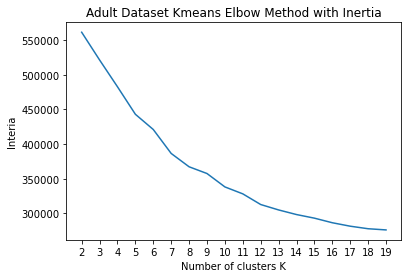

In [5]:
plt.plot(K,inertia_list)
plt.xticks(K)
plt.title('Adult Dataset Kmeans Elbow Method with Inertia')
plt.ylabel('Interia')
plt.xlabel('Number of clusters K')

In [20]:
from scipy.spatial.distance import cdist
#from distython import HEOM
inertia_list = []
K = range(2, 20)
####KMean
for i in K:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_bean)
    inertia_list.append(kmeans.inertia_)
    
    y_kmeans = kmeans.predict(X_bean)
    


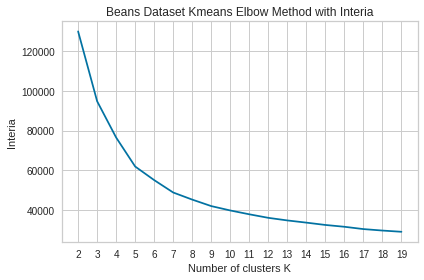

In [27]:
plt.plot(K,inertia_list)
plt.xticks(K)
plt.title('Beans Dataset Kmeans Elbow Method with Interia')
plt.ylabel('Interia')
plt.xlabel('Number of clusters K')
plt.tight_layout()
plt.savefig('Figure_1.png')

In [76]:
X_bean.mean()
#X_bean.std()

Area              -6.604363e-16
Perimeter         -1.216596e-15
MajorAxisLength    8.703803e-16
MinorAxisLength    4.103445e-16
AspectRation      -5.324805e-16
Eccentricity      -7.462051e-16
ConvexArea        -9.092597e-16
EquivDiameter     -3.963800e-16
Extent            -1.876922e-15
Solidity          -2.301027e-14
roundness          2.380687e-16
Compactness       -5.287263e-16
ShapeFactor1      -8.734513e-16
ShapeFactor2       7.887938e-16
ShapeFactor3      -5.410043e-16
ShapeFactor4       1.991064e-14
dtype: float64

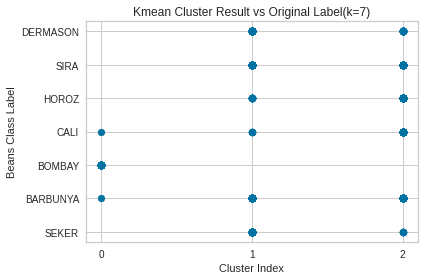

In [49]:
kmeans = KMeans(n_clusters=3,max_iter=100000000,random_state=42)
kmeans.fit(X_bean)
#print(X_bean)
c_label = kmeans.fit_predict(X_bean)

plt.scatter(c_label,y_bean)
plt.ylabel('Beans Class Label')
plt.xlabel('Cluster Index')
plt.xticks([0,1,2])
plt.title('Kmean Cluster Result vs Original Label(k=7)')
plt.tight_layout()
plt.savefig('Figure_3.png')

In [30]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score
#from yellowbrick.datasets import load_nfl
s_score_list = []
# Load a clustering dataset
for i in K:
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X_bean)
    #inertia_list.append(kmeans.inertia_)
    c_label =kmeans.predict(X_bean)
    silhouette_avg = silhouette_score(X_bean,c_label)
    print(silhouette_avg,i)
    s_score_list.append(silhouette_avg)
    y_kmeans = kmeans.predict(X_bean)

0.39665358971827025 2
0.4047452116044009 3
0.341642682168923 4
0.3568984864249916 5
0.3601922966824019 6
0.30937979043741126 7
0.30302087289476326 8
0.30322902525318185 9
0.28758236896051204 10
0.26295287167024334 11
0.26227079723515767 12
0.26462159917579015 13
0.2644134521386126 14
0.23197264680349747 15
0.24487349956379653 16
0.22977125169217527 17
0.22789676702006909 18
0.2230214640816708 19


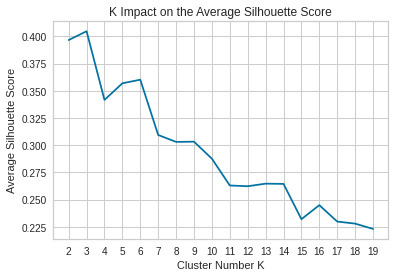

In [46]:
plt.plot(K,s_score_list)
plt.xticks(K)
plt.ylabel('Average Silhouette Score')
plt.xlabel('Cluster Number K')
plt.title('K Impact on the Average Silhouette Score')
plt.savefig('Figure_2.png')

In [87]:
X_bean.mean()

Area              -6.604363e-16
Perimeter         -1.216596e-15
MajorAxisLength    8.703803e-16
MinorAxisLength    4.103445e-16
AspectRation      -5.324805e-16
Eccentricity      -7.462051e-16
ConvexArea        -9.092597e-16
EquivDiameter     -3.963800e-16
Extent            -1.876922e-15
Solidity          -2.301027e-14
roundness          2.380687e-16
Compactness       -5.287263e-16
ShapeFactor1      -8.734513e-16
ShapeFactor2       7.887938e-16
ShapeFactor3      -5.410043e-16
ShapeFactor4       1.991064e-14
dtype: float64

In [120]:
from random import random
from sklearn import mixture
bic = []
s_score_list=[]
K=range(2,20)
cv_types = ["spherical", "tied", "diag", "full"]

for i in K:
    gmm = mixture.GaussianMixture(n_components=i,covariance_type='full',max_iter=10000,tol=0.001,random_state=42,)
    gmm.fit(X_bean)
    c_label =gmm.predict(X_bean)
    print(c_label)
    silhouette_avg = silhouette_score(X_bean,c_label)
    bic.append(gmm.aic(X_bean))
    s_score_list.append(silhouette_avg)


[0 0 0 ... 0 0 0]
[1 1 1 ... 2 2 2]
[1 1 1 ... 1 1 0]
[1 1 1 ... 4 4 4]
[1 1 1 ... 4 4 4]
[1 1 1 ... 2 2 2]
[7 7 7 ... 2 2 4]
[4 4 3 ... 1 1 1]
[1 1 1 ... 6 6 6]
[ 1  1  1 ...  6  6 10]
[4 4 4 ... 1 1 7]
[9 9 9 ... 3 3 4]
[1 1 1 ... 2 2 8]
[5 5 5 ... 1 1 4]
[ 9  9  9 ... 10 10 12]
[14 14  1 ... 16 16  2]
[2 2 2 ... 6 6 1]
[16 16 16 ... 18 18  1]


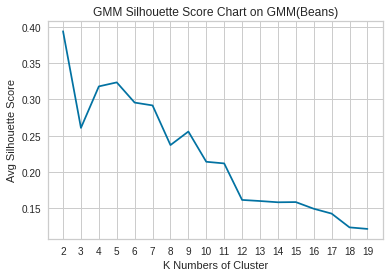

In [119]:
plt.plot(K,s_score_list)
plt.xticks(K)
plt.ylabel('Avg Silhouette Score')
plt.xlabel('K Numbers of Cluster')
plt.title('GMM Silhouette Score Chart on GMM(Beans)')
plt.savefig('Figure_4.png')

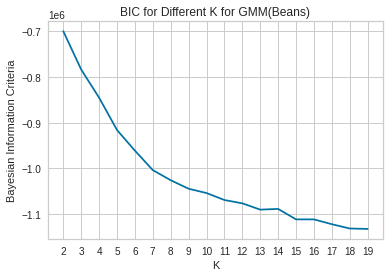

In [121]:
plt.plot(K,bic)
plt.xticks(K)
plt.ylabel('Bayesian Information Criteria')
plt.xlabel('K')
plt.title('BIC for Different K for GMM(Beans)')
plt.savefig('Figure_5.png')

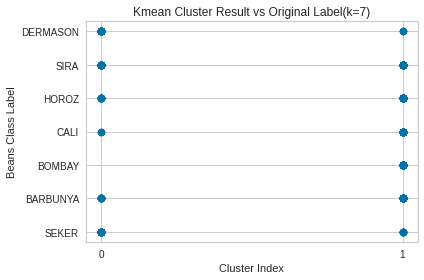

In [126]:
gmm =  mixture.GaussianMixture(n_components=2,covariance_type='full',max_iter=10000,tol=0.001,random_state=42,)
gmm.fit(X_bean)
#print(X_bean)
c_label = gmm.fit_predict(X_bean)

plt.scatter(c_label,y_bean)
plt.ylabel('Beans Class Label')
plt.xlabel('Cluster Index')
plt.xticks([0,1])
plt.title('Kmean Cluster Result vs Original Label(k=7)')
plt.tight_layout()
plt.savefig('Figure_6.png')

In [7]:
from kmodes.kprototypes import KPrototypes
cost_list=[]
K=range(2,10)
#adult_label_col.remove('50K')
catColumnsPos = [X_adult.columns.get_loc(col) for col in adult_label_col]
for i in K:
    kprototype = KPrototypes(n_jobs = -1, n_clusters = i, init = 'Huang', random_state = 42)
    kprototype.fit_predict(X_adult, categorical = catColumnsPos)
    cost_list.append(kprototype.cost_)
    silhouette_score()
    

In [8]:
kprototype = KPrototypes(n_jobs = -1, n_clusters = 2, init = 'Huang', random_state = 42)
kprototype.fit_predict(X_adult, categorical = catColumnsPos)

array([1, 1, 1, ..., 0, 1, 1], dtype=uint16)

In [10]:
print(kprototype.cost_)

207635221813089.25


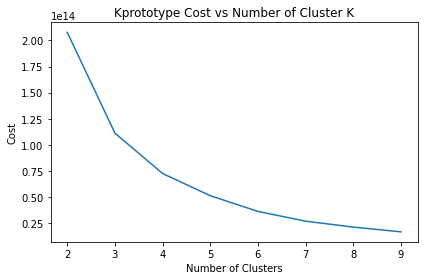

In [12]:
plt.plot(K,cost_list)
plt.title('Kprototype Cost vs Number of Cluster K')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.tight_layout()
plt.savefig('Figure_7.png')

In [10]:
catColumnsPos = [X_adult.columns.get_loc(col) for col in adult_label_col]
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 42)
kprototype.fit_predict(X_adult, categorical = catColumnsPos)

array([1, 1, 0, ..., 2, 1, 0], dtype=uint16)

In [40]:
####count the class label
c_label = kprototype.predict(X_adult,categorical=catColumnsPos)
adult_df_c = adult_df.copy()
adult_df_c['c'] = c_label
#adult_df_c['frequency'] = adult_df_c['c'].map(adult_df_c['c'].value_counts())

c_list = [0,1,2]
adult_0 = adult_df_c[adult_df_c['c']==0]
adult_1 = adult_df_c[adult_df_c['c']==1]
adult_2 = adult_df_c[adult_df_c['c']==2]
adult_0['frequency'] = adult_0['50K'].map(adult_0['50K'].value_counts())
adult_1['frequency'] = adult_1['50K'].map(adult_1['50K'].value_counts())
adult_2['frequency'] = adult_2['50K'].map(adult_2['50K'].value_counts())


/tmp/ipykernel_387889/762686652.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_0['frequency'] = adult_0['50K'].map(adult_0['50K'].value_counts())
/tmp/ipykernel_387889/762686652.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_1['frequency'] = adult_1['50K'].map(adult_1['50K'].value_counts())
/tmp/ipykernel_387889/762686652.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

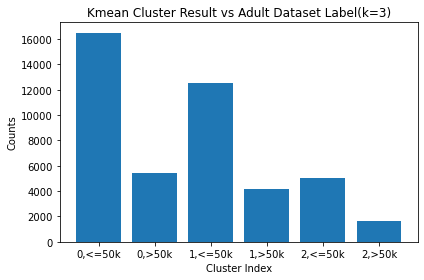

In [38]:
#c_label = kprototype.fit_predict(X_bean)
c_label = kprototype.predict(X_adult,categorical=catColumnsPos)
plt.bar(['0,<=50k','0,>50k','1,<=50k','1,>50k','2,<=50k','2,>50k'],[16494,5467,12500,4131,5020,1610])
plt.ylabel('Counts')
plt.xlabel('Cluster Index')
#plt.xticks([0,1,2,3,4,6,7])
plt.title('Kmean Cluster Result vs Adult Dataset Label(k=3)')
plt.tight_layout()
plt.savefig('Figure_8.png')

In [ ]:
from random import random
from sklearn import mixture
bic_full = []
bic_diag = []
bic_spherical = []
bic_tied = []
s_score_list=[]
K=range(2,8)
for i in K:
    gmm = mixture.GaussianMixture(n_components=i,covariance_type='full',max_iter=10000,tol=0.001,random_state=42,)
    gmm.fit(X_adult)
    c_label =gmm.predict(X_adult)
    print(c_label)
    silhouette_avg = silhouette_score(X_adult,c_label)
    bic_full.append(gmm.aic(X_adult))
    s_score_list.append(silhouette_avg)
for i in K:
    gmm = mixture.GaussianMixture(n_components=i,covariance_type='tied',max_iter=10000,tol=0.001,random_state=42,)
    gmm.fit(X_adult)
    c_label =gmm.predict(X_adult)
    print(c_label)
    silhouette_avg = silhouette_score(X_adult,c_label)
    bic_tied.append(gmm.aic(X_adult))
    s_score_list.append(silhouette_avg)
for i in K:
    gmm = mixture.GaussianMixture(n_components=i,covariance_type='spherical',max_iter=10000,tol=0.001,random_state=42,)
    gmm.fit(X_adult)
    c_label =gmm.predict(X_adult)
    print(c_label)
    silhouette_avg = silhouette_score(X_adult,c_label)
    bic_spherical.append(gmm.aic(X_adult))
    s_score_list.append(silhouette_avg)
for i in K:
    gmm = mixture.GaussianMixture(n_components=i,covariance_type='diag',max_iter=10000,tol=0.001,random_state=42,)
    gmm.fit(X_adult)
    c_label =gmm.predict(X_adult)
    print(c_label)
    silhouette_avg = silhouette_score(X_adult,c_label)
    bic_diag.append(gmm.aic(X_adult))
    s_score_list.append(silhouette_avg)

[0 0 0 ... 0 1 0]
[2 0 0 ... 0 2 0]
[3 0 0 ... 0 3 0]
[0 2 2 ... 2 0 2]
[2 4 4 ... 4 0 4]
[0 4 4 ... 4 0 4]
[1 4 5 ... 4 7 4]
[7 0 0 ... 0 1 0]
[3 8 1 ... 8 3 8]
[6 5 3 ... 5 0 5]
[ 3  9 10 ...  9  3  9]
[ 9 10  8 ... 10  2 10]
[ 6  3  4 ...  3 13  3]
[ 5  4  4 ...  4 13  4]
[12  9 11 ...  9  2  9]
[10  8 13 ...  8 14  8]
[14  3  5 ...  3 14  3]
[ 9 13  5 ... 13  0 13]


Text(0.5, 1.0, 'K Impact on the Average Silhouette Score(Adult)')

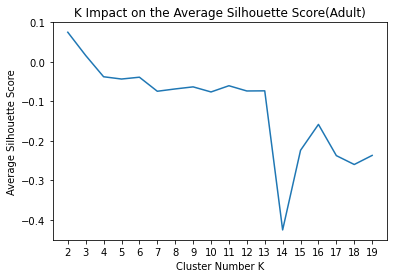

In [24]:
s_score_list = []
for i in K:
    gmm = mixture.GaussianMixture(n_components=i,covariance_type='diag',max_iter=10000,tol=0.001,random_state=42,)
    gmm.fit(X_adult)
    c_label =gmm.predict(X_adult)
    print(c_label)
    silhouette_avg = silhouette_score(X_adult,c_label)
    bic_diag.append(gmm.aic(X_adult))
    s_score_list.append(silhouette_avg)
plt.plot(K,s_score_list)
plt.xticks(K)
plt.ylabel('Average Silhouette Score')
plt.xlabel('Cluster Number K')
plt.title('K Impact on the Average Silhouette Score(Bean)')
#plt.savefig('Figure_2.png')


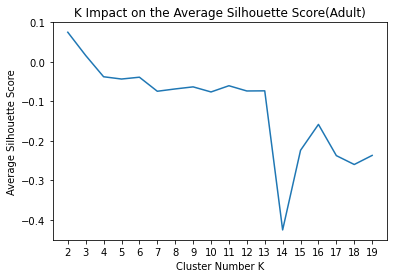

In [25]:
plt.plot(K,s_score_list)
plt.xticks(K)
plt.ylabel('Average Silhouette Score')
plt.xlabel('Cluster Number K')
plt.title('K Impact on the Average Silhouette Score(Adult)')
plt.savefig('Figure_10.png')


In [18]:
from random import random
from sklearn import mixture
bic_full = []
bic_diag = []
bic_spherical = []
bic_tied = []
s_score_list=[]
K=range(2,20)
for i in K:
    gmm = mixture.GaussianMixture(n_components=i,covariance_type='full',max_iter=10000,tol=0.001,random_state=42,)
    gmm.fit(X_bean)
    c_label =gmm.predict(X_bean)
    print(c_label)
    silhouette_avg = silhouette_score(X_bean,c_label)
    bic_full.append(gmm.aic(X_bean))
    s_score_list.append(silhouette_avg)
for i in K:
    gmm = mixture.GaussianMixture(n_components=i,covariance_type='tied',max_iter=10000,tol=0.001,random_state=42,)
    gmm.fit(X_bean)
    c_label =gmm.predict(X_bean)
    print(c_label)
    silhouette_avg = silhouette_score(X_bean,c_label)
    bic_tied.append(gmm.aic(X_bean))
    s_score_list.append(silhouette_avg)
for i in K:
    gmm = mixture.GaussianMixture(n_components=i,covariance_type='spherical',max_iter=10000,tol=0.001,random_state=42,)
    gmm.fit(X_bean)
    c_label =gmm.predict(X_bean)
    print(c_label)
    silhouette_avg = silhouette_score(X_bean,c_label)
    bic_spherical.append(gmm.aic(X_bean))
    s_score_list.append(silhouette_avg)
for i in K:
    gmm = mixture.GaussianMixture(n_components=i,covariance_type='diag',max_iter=10000,tol=0.001,random_state=42,)
    gmm.fit(X_bean)
    c_label =gmm.predict(X_bean)
    print(c_label)
    silhouette_avg = silhouette_score(X_bean,c_label)
    bic_diag.append(gmm.aic(X_bean))
    s_score_list.append(silhouette_avg)

[0 0 0 ... 0 0 0]
[1 1 1 ... 2 2 2]
[1 1 1 ... 1 1 0]
[1 1 1 ... 4 4 4]
[1 1 1 ... 4 4 4]
[1 1 1 ... 2 2 2]
[7 7 7 ... 2 2 4]
[4 4 3 ... 1 1 1]
[1 1 1 ... 6 6 6]
[ 1  1  1 ...  6  6 10]
[4 4 4 ... 1 1 7]
[9 9 9 ... 3 3 4]
[1 1 1 ... 2 2 8]
[5 5 5 ... 1 1 4]
[ 9  9  9 ... 10 10 12]
[14 14  1 ... 16 16  2]
[2 2 2 ... 6 6 1]
[16 16 16 ... 18 18  1]
[0 0 0 ... 0 0 0]
[1 1 1 ... 2 2 2]
[1 1 1 ... 1 1 1]
[1 1 1 ... 4 4 4]
[1 1 1 ... 4 4 4]
[1 1 1 ... 2 2 2]
[7 7 7 ... 2 2 4]
[3 3 3 ... 1 1 1]
[1 1 1 ... 6 6 6]
[ 1  1  1 ...  6  6 10]
[4 4 4 ... 1 1 1]
[9 9 9 ... 3 3 3]
[1 1 1 ... 2 2 2]
[10  5 10 ...  4  4  4]
[ 7  9  7 ... 12 12 12]
[ 1  1  1 ... 16 16 16]
[10  2  6 ...  1  1  1]
[ 2 16  2 ... 18 18  1]
[0 0 0 ... 0 0 0]
[1 1 1 ... 2 2 2]
[1 1 1 ... 1 1 1]
[1 1 1 ... 4 4 4]
[1 1 1 ... 4 4 4]
[1 1 1 ... 2 2 2]
[7 7 7 ... 2 4 4]
[3 3 3 ... 1 1 1]
[1 1 1 ... 3 9 6]
[ 1  1  1 ...  6 10 10]
[4 4 4 ... 8 7 1]
[ 9  5  9 ... 10  4  3]
[ 1 13  1 ... 12  8  2]
[ 5  5  5 ...  1 12  4]
[ 9  9  9 ... 10

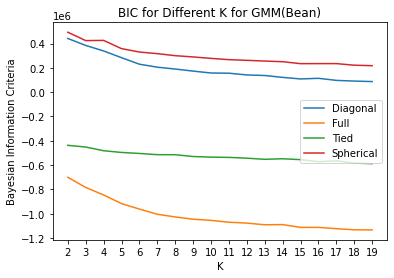

In [22]:
plt.plot(K,bic_diag,label='Diagonal')
plt.plot(K,bic_full,label='Full')
plt.plot(K,bic_tied,label='Tied')
plt.plot(K,bic_spherical,label='Spherical')
#plt.yscale('log')
plt.xticks(K)
plt.ylabel('Bayesian Information Criteria')
plt.xlabel('K')
plt.title('BIC for Different K for GMM(Bean)')
plt.legend()
plt.savefig('Figure_5.png')

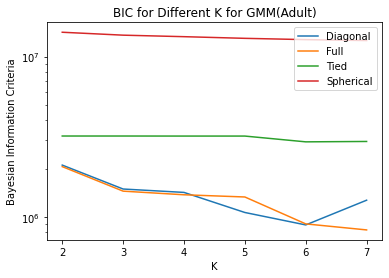

In [17]:
plt.plot(K,bic_diag,label='Diagonal')
plt.plot(K,bic_full,label='Full')
plt.plot(K,bic_tied,label='Tied')
plt.plot(K,bic_spherical,label='Spherical')
plt.yscale('log')
plt.xticks(K)
plt.ylabel('Bayesian Information Criteria')
plt.xlabel('K')
plt.title('BIC for Different K for GMM(Adult)')
plt.legend()
plt.savefig('Figure_9.png')

In [17]:
####count the class label

gmm = mixture.GaussianMixture(n_components=6,covariance_type='diag',max_iter=10000,tol=0.001,random_state=42,)
gmm.fit(X_adult)
c_label = gmm.predict(X_adult)
adult_df_c = adult_df.copy()
adult_df_c['c'] = c_label
#adult_df_c['frequency'] = adult_df_c['c'].map(adult_df_c['c'].value_counts())

c_list = [0,1,2]
adult_0 = adult_df_c[adult_df_c['c']==0]
adult_1 = adult_df_c[adult_df_c['c']==1]
adult_2 = adult_df_c[adult_df_c['c']==2]
adult_3 = adult_df_c[adult_df_c['c']==3]
adult_4 = adult_df_c[adult_df_c['c']==4]
adult_5 = adult_df_c[adult_df_c['c']==5]

adult_0['frequency'] = adult_0['50K'].map(adult_0['50K'].value_counts())
adult_1['frequency'] = adult_1['50K'].map(adult_1['50K'].value_counts())
adult_2['frequency'] = adult_2['50K'].map(adult_2['50K'].value_counts())
adult_3['frequency'] = adult_3['50K'].map(adult_3['50K'].value_counts())
adult_4['frequency'] = adult_4['50K'].map(adult_4['50K'].value_counts())
adult_5['frequency'] = adult_5['50K'].map(adult_5['50K'].value_counts())

#adult_2['frequency'] = adult_2['50K'].map(adult_2['50K'].value_counts())



/tmp/ipykernel_442971/667271044.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_0['frequency'] = adult_0['50K'].map(adult_0['50K'].value_counts())
/tmp/ipykernel_442971/667271044.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_1['frequency'] = adult_1['50K'].map(adult_1['50K'].value_counts())
/tmp/ipykernel_442971/667271044.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [ ]:
[1100,881,124,27,1357,2592,3918,456,24543,6709,24543,6709]

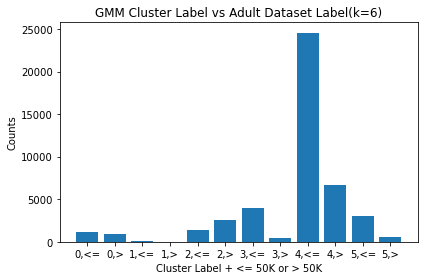

In [19]:
#c_label = kprototype.fit_predict(X_bean)
#c_label = kprototype.predict(X_adult,categorical=catColumnsPos)
plt.bar(['0,<=','0,>','1,<=','1,>','2,<=','2,>','3,<=','3,>','4,<=','4,>','5,<=','5,>'],[1100,881,124,27,1357,2592,3918,456,24543,6709,2972,543])
plt.ylabel('Counts')
plt.xlabel('Cluster Label + <= 50K or > 50K')
#plt.xticks([0,1,2,3,4,6,7])
plt.title('GMM Cluster Label vs Adult Dataset Label(k=6)')
plt.tight_layout()
plt.savefig('Figure_11.png')

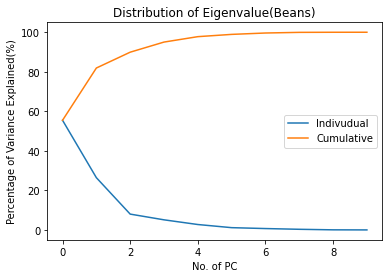

In [3]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=10)
#pca = decomposition.PCA()
pca.fit(X_bean)
#X = pca.transform(X_bean)

plt.plot(100*pca.explained_variance_ratio_,label='Indivudual')
plt.plot(np.cumsum(100*pca.explained_variance_ratio_),label='Cumulative')
plt.ylabel('Percentage of Variance Explained(%)')
plt.xlabel('No. of PC')
plt.legend()
plt.title('Distribution of Eigenvalue(Beans)')
plt.savefig('Figure_12.png')

In [12]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.55466439 0.81897412 0.89903976 0.95018056 0.97757349 0.9890711
 0.99604761 0.99929843 0.9998147  0.99990557]


In [13]:
pca = decomposition.PCA(n_components=3)
#pca = decomposition.PCA()
pca.fit(X_bean)
X = pca.transform(X_bean)
from scipy.spatial.distance import cdist
#from distython import HEOM
inertia_list = []
K = range(2, 20)
####KMean for Adult
for i in K:
    kmeans = KMeans(n_clusters=i,init='k-means++',)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)
    
    y_kmeans = kmeans.predict(X)


Text(0.5, 0, 'Number of clusters K')

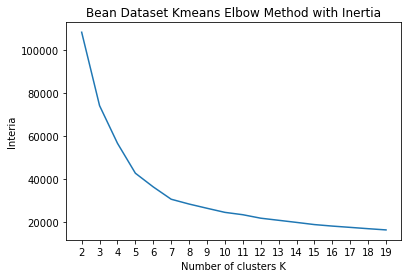

In [15]:
plt.plot(K,inertia_list)
plt.xticks(K)
plt.title('Bean Dataset Kmeans Elbow Method with Inertia')
plt.ylabel('Interia')
plt.xlabel('Number of clusters K')

In [16]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score
#from yellowbrick.datasets import load_nfl
s_score_list = []
# Load a clustering dataset
for i in K:
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    #inertia_list.append(kmeans.inertia_)
    c_label =kmeans.predict(X)
    silhouette_avg = silhouette_score(X,c_label)
    print(silhouette_avg,i)
    s_score_list.append(silhouette_avg)
    #y_kmeans = kmeans.predict(X)

0.44192130592785733 2
0.4540488152550475 3
0.40221100454147163 4
0.42350368632755686 5
0.4293020908814284 6
0.3872400978578444 7
0.3656028113495847 8
0.33467646677756063 9
0.33825857467510495 10
0.3127432818261117 11
0.3145965572375925 12
0.31839340130550253 13
0.30755889827535504 14
0.29182201386856893 15
0.279085255011871 16
0.27027002524200366 17
0.2658479149064508 18
0.261668371679372 19


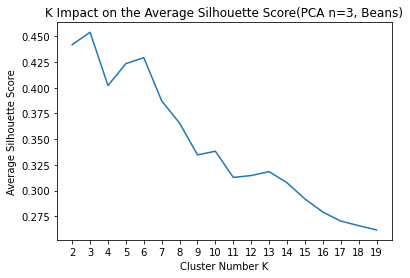

In [19]:
plt.plot(K,s_score_list)
plt.xticks(K)
plt.ylabel('Average Silhouette Score')
plt.xlabel('Cluster Number K')
plt.title('K Impact on the Average Silhouette Score(PCA n=3, Beans)')
plt.savefig('Figure_13.png')

In [3]:
import matplotlib
codes, uniques = pd.factorize(y_bean)

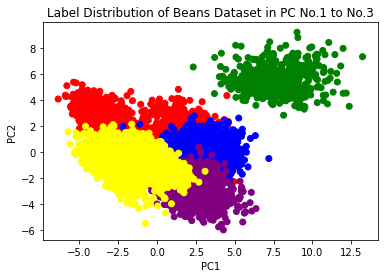

In [11]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
#pca = decomposition.PCA()
pca.fit(X_bean)
X = pca.transform(X_bean)
fig = plt.figure()
ax = fig.add_subplot()
colors = ['red','green','blue','purple','yellow']
#c_label = pca.predict(X)
ax.scatter(X[:,0], X[:,1],c=codes,cmap=matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
#ax.set_zlabel('PC3')
ax.set_title('Label Distribution of Beans Dataset in PC No.1 to No.3')
plt.savefig('Figure_14.png')


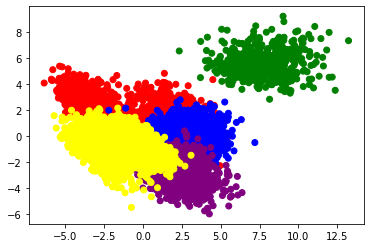

In [36]:
plt.scatter(X[:,0], X[:,1],c=codes,cmap=matplotlib.colors.ListedColormap(colors))


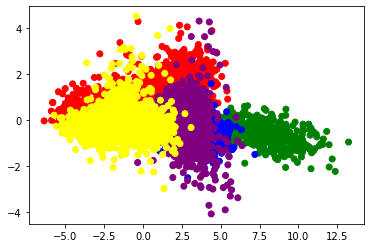

In [32]:
plt.scatter(X[:,0], X[:,4],c=codes,cmap=matplotlib.colors.ListedColormap(colors))

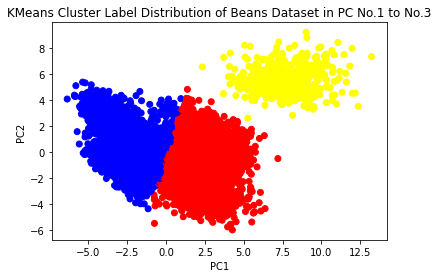

In [29]:
import matplotlib
pca = decomposition.PCA(n_components=3)
#pca = decomposition.PCA()
pca.fit(X_bean)
X = pca.transform(X_bean)
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans.fit(X)
c_label = kmeans.predict(X)
fig = plt.figure()
ax = fig.add_subplot()#(projection='3d')
colors = ['red','green','blue','purple','yellow']
#c_label = pca.predict(X)
ax.scatter(X[:,0], X[:,1],c=c_label,cmap=matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
#ax.set_zlabel('PC3')
ax.set_title('KMeans Cluster Label Distribution of Beans Dataset in PC No.1 to No.3')
plt.savefig('Figure_15.png')

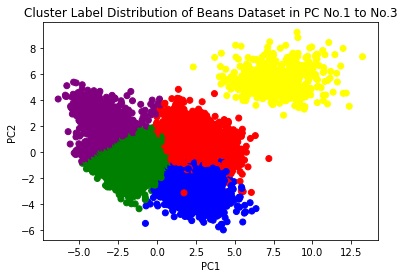

In [18]:
import matplotlib
pca = decomposition.PCA(n_components=3)
#pca = decomposition.PCA()
pca.fit(X_bean)
X = pca.transform(X_bean)
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
kmeans.fit(X)
c_label = kmeans.predict(X)
fig = plt.figure()
ax = fig.add_subplot()#(projection='3d')
colors = ['red','green','blue','purple','yellow']
#c_label = pca.predict(X)
ax.scatter(X[:,0], X[:,1],c=c_label,cmap=matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
#ax.set_zlabel('PC3')
ax.set_title('Cluster Label Distribution of Beans Dataset in PC No.1 to No.3')
plt.savefig('Figure_16.png')

In [24]:
from random import random
from sklearn import mixture
bic = []
s_score_list=[]
K=range(2,10)
cv_types = ["spherical", "tied", "diag", "full"]

for i in K:
    gmm = mixture.GaussianMixture(n_components=i,covariance_type='full',max_iter=10000,tol=0.001,random_state=42,)
    gmm.fit(X)
    c_label =gmm.predict(X)
    print(c_label)
    silhouette_avg = silhouette_score(X,c_label)
    bic.append(gmm.aic(X))
    s_score_list.append(silhouette_avg)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 0 1 ... 1 1 1]
[1 1 1 ... 4 4 4]
[1 1 1 ... 5 4 5]
[6 4 6 ... 5 5 5]
[6 7 6 ... 1 3 3]
[6 7 6 ... 1 3 1]


Text(0.5, 1.0, 'GMM Silhouette Score Chart on GMM(Beans)')

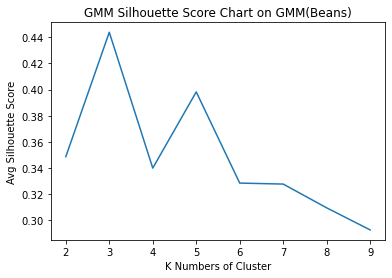

In [25]:
plt.plot(K,s_score_list)
plt.xticks(K)
plt.ylabel('Avg Silhouette Score')
plt.xlabel('K Numbers of Cluster')
plt.title('GMM Silhouette Score Chart on GMM(Beans)')
#plt.savefig('Figure_4.png')

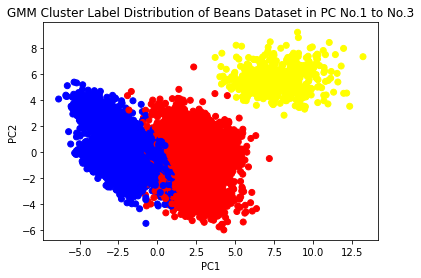

In [28]:
import matplotlib
pca = decomposition.PCA(n_components=3)
#pca = decomposition.PCA()
pca.fit(X_bean)
X = pca.transform(X_bean)
gmm = mixture.GaussianMixture(n_components=3,covariance_type='full',max_iter=10000,tol=0.001,random_state=42,)

gmm.fit(X)
c_label = gmm.predict(X)
fig = plt.figure()
ax = fig.add_subplot()#(projection='3d')
colors = ['red','green','blue','purple','yellow']
#c_label = pca.predict(X)
ax.scatter(X[:,0], X[:,1],c=c_label,cmap=matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
#ax.set_zlabel('PC3')
ax.set_title('GMM Cluster Label Distribution of Beans Dataset in PC No.1 to No.3')
plt.savefig('Figure_17.png')

In [2]:

##normalize

adult_label_col =['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
adult_df[adult_label_col] = adult_df[adult_label_col].astype('category')
adult_df[adult_label_col] = adult_df[adult_label_col].apply(lambda x: x.cat.codes)

scaler = StandardScaler(with_mean=True,with_std=True)
num_label = ['age','education-num','capital-gain','capital-loss','hours-per-week']

#all_label =list(adult_df)
#all_label.remove('50K')
adult_df[num_label] = scaler.fit_transform(adult_df[num_label] )
X_adult_num = adult_df[num_label].copy()

[26.31163742 20.61437501 19.29829145 17.72563663 16.0500595 ]


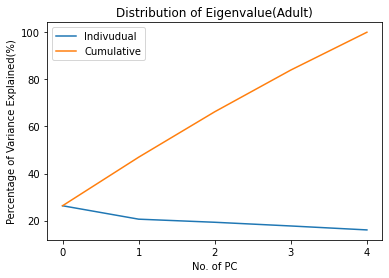

In [9]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=5)
#pca = decomposition.PCA()
pca.fit(X_adult_num)
#X = pca.transform(X_bean)
print(100*pca.explained_variance_ratio_)
plt.plot(100*pca.explained_variance_ratio_,label='Indivudual')
plt.plot(np.cumsum(100*pca.explained_variance_ratio_),label='Cumulative')
plt.xticks([0,1,2,3,4])
plt.ylabel('Percentage of Variance Explained(%)')
plt.xlabel('No. of PC')
plt.legend()
plt.title('Distribution of Eigenvalue(Adult)')
plt.savefig('Figure_18.png')

In [10]:
import matplotlib
pca = decomposition.PCA(n_components=4)
#pca = decomposition.PCA()
pca.fit(X_adult_num)
X = pca.transform(X_adult_num)

Text(0.5, 1.0, 'Cluster Label Distribution of Beans Dataset in PC No.1 to No.3')

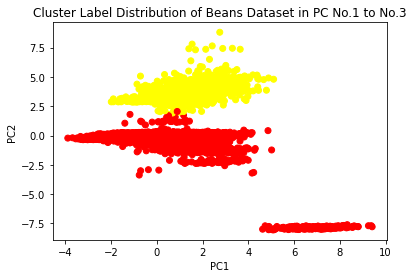

In [13]:
import matplotlib
pca = decomposition.PCA(n_components=4)
#pca = decomposition.PCA()
pca.fit(X_adult_num)
X = pca.transform(X_adult_num)
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=42)
kmeans.fit(X)
c_label = kmeans.predict(X)
fig = plt.figure()
ax = fig.add_subplot()#(projection='3d')
colors = ['red','green','blue','purple','yellow']
#c_label = pca.predict(X)
ax.scatter(X[:,0], X[:,1],c=c_label,cmap=matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
#ax.set_zlabel('PC3')
ax.set_title('Cluster Label Distribution of Beans Dataset in PC No.1 to No.3')
#plt.savefig('Figure_16.png')

In [ ]:
import matplotlib
pca = decomposition.PCA(n_components=3)
#pca = decomposition.PCA()
#pca.fit(X)
#X = pca.transform(X)
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=42)
kmeans.fit(X)
c_label = kmeans.predict(X)
fig = plt.figure()
ax = fig.add_subplot()#(projection='3d')
colors = ['red','green','blue','purple','yellow']
#c_label = pca.predict(X)
ax.scatter(X[:,0], X[:,1],c=y_adult,cmap=matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
#ax.set_zlabel('PC3')
ax.set_title('Cluster Label Distribution of Beans Dataset in PC No.1 to No.3')
plt.savefig('Figure_16.png')

Text(0.5, 1.0, 'Cluster Label Distribution of Adult Dataset in PC2/PC3 Plane')

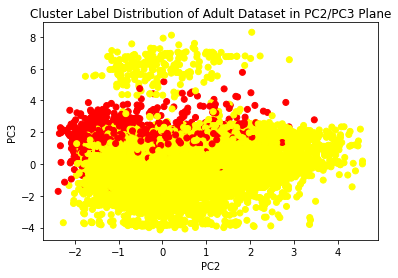

In [42]:
import matplotlib
pca = decomposition.PCA(n_components=3)
#pca = decomposition.PCA()
#pca.fit(X)
#X = pca.transform(X)
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=42)
kmeans.fit(X)
c_label = kmeans.predict(X)
fig = plt.figure()
ax = fig.add_subplot()#(projection='3d')
#colors = ['red','green','blue','purple','yellow']
colors = ['yellow','green','blue','purple','red']

#c_label = pca.predict(X)
#ax.
ax.scatter(X[:,2], X[:,3],c=c_label,cmap=matplotlib.colors.ListedColormap(colors))
#print(matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('PC2')
ax.set_ylabel('PC3')
#ax.set_zlabel('PC3')
ax.set_title('Cluster Label Distribution of Adult Dataset in PC2/PC3 Plane')
#plt.savefig('Figure_20.png')

In [14]:
import matplotlib
codes, uniques = pd.factorize(y_adult)

In [27]:
from random import random
from sklearn import mixture
bic = []
s_score_list=[]
K=range(2,10)
cv_types = ["spherical", "tied", "diag", "full"]

for i in K:
    gmm = mixture.GaussianMixture(n_components=i,covariance_type='full',max_iter=10000,tol=0.001,random_state=42,)
    gmm.fit(X)
    c_label =gmm.predict(X)
    print(c_label)
    silhouette_avg = silhouette_score(X,c_label)
    bic.append(gmm.aic(X))
    s_score_list.append(silhouette_avg)

[1 0 0 ... 0 1 0]
[0 2 2 ... 2 0 2]
[1 0 2 ... 2 1 2]
[1 0 2 ... 2 1 2]
[1 0 2 ... 0 1 0]
[1 0 6 ... 2 1 2]
[0 6 4 ... 1 0 1]
[7 1 8 ... 1 7 1]


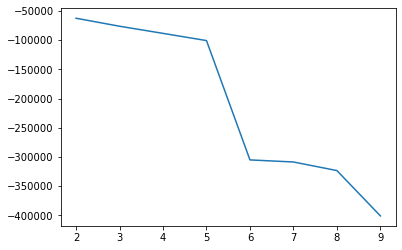

In [29]:
plt.plot(K,bic)

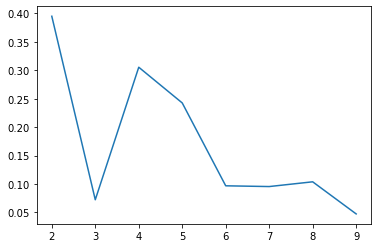

In [28]:
plt.plot(K,s_score_list)

Text(0.5, 1.0, 'Cluster Label Distribution of Adult Dataset in PC2/PC3 Plane(GMM)')

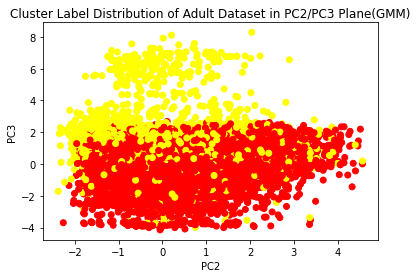

In [31]:
import matplotlib
pca = decomposition.PCA(n_components=3)
#pca = decomposition.PCA()
#pca.fit(X)
#X = pca.transform(X)
#kmeans = KMeans(n_clusters=2,init='k-means++',random_state=42)
gmm = mixture.GaussianMixture(n_components=2,covariance_type='full',max_iter=10000,tol=0.001,random_state=42,)
gmm.fit(X)
c_label = gmm.predict(X)
fig = plt.figure()
ax = fig.add_subplot()#(projection='3d')
#colors = ['red','green','blue','purple','yellow']
colors = ['red','green','blue','purple','yellow']

#c_label = pca.predict(X)
#ax.
ax.scatter(X[:,2], X[:,3],c=c_label,cmap=matplotlib.colors.ListedColormap(colors))
#print(matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('PC2')
ax.set_ylabel('PC3')
#ax.set_zlabel('PC3')
ax.set_title('Cluster Label Distribution of Adult Dataset in PC2/PC3 Plane(GMM)')
plt.savefig('Figure_20.png')

In [43]:
print(c_label)
print(codes)
print('kmean')
c=np.asarray(codes-c_label)
np.unique(c)
count = np.count_nonzero(c == -1)
print(count)
count = np.count_nonzero(c == 0)
print(count)
count = np.count_nonzero(c == 1)
print(count)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 1]
kmean
1001
34109
10112


In [41]:
print(c_label)
print(codes)
print('gmm')
c=np.asarray(codes-c_label)
np.unique(c)
count = np.count_nonzero(c == -1)
print(count)
count = np.count_nonzero(c == 0)
print(count)
count = np.count_nonzero(c == 1)
print(count)

[1 0 0 ... 0 1 0]
[0 0 0 ... 0 0 1]
GaussianMixture(max_iter=10000, n_components=2, random_state=42)
2458
35031
7733


/home/sun/miniconda3/envs/playground/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


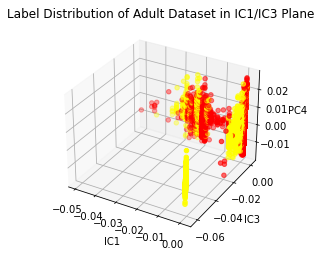

In [81]:
ica = decomposition.FastICA(n_components=None,random_state=42)
ica.fit(X_adult_num)
X = ica.transform(X_adult_num)
#c_label = gmm.predict(X)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#colors = ['red','green','blue','purple','yellow']
colors = ['red','green','blue','purple','yellow']

#c_label = pca.predict(X)
#ax.
ax.scatter(X[:,1], X[:,3],X[:,4],c=codes,cmap=matplotlib.colors.ListedColormap(colors))
#print(matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('IC1')
ax.set_ylabel('IC3')
ax.set_zlabel('PC4')
ax.set_title('Label Distribution of Adult Dataset in IC1/IC3 Plane')
plt.savefig('Figure_21.png')

/home/sun/miniconda3/envs/playground/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


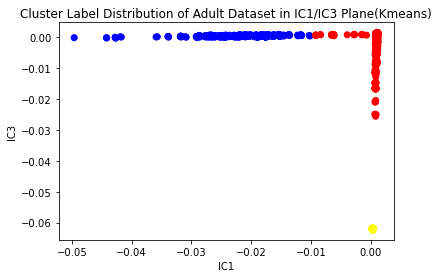

In [90]:
ica = decomposition.FastICA(n_components=None,random_state=42)
ica.fit(X_adult_num)
X = ica.transform(X_adult_num)
kmeans = KMeans(n_clusters=3,init='k-means++',)
X = X[:,[1,3]]
kmeans.fit(X)
c_label =kmeans.predict(X)
fig = plt.figure()
ax = fig.add_subplot()
#colors = ['red','green','blue','purple','yellow']
colors = ['red','green','blue','purple','yellow']

#c_label = pca.predict(X)
#ax.
ax.scatter(X[:,0], X[:,1],c=c_label,cmap=matplotlib.colors.ListedColormap(colors))
#print(matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('IC1')
ax.set_ylabel('IC3')
#ax.set_zlabel('PC4')
ax.set_title('Cluster Label Distribution of Adult Dataset in IC1/IC3 Plane(Kmeans)')
plt.savefig('Figure_22.png')

/home/sun/miniconda3/envs/playground/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


Text(0.5, 1.0, 'Cluster Label Distribution of Adult Dataset in IC1/IC3 Plane(GMM)')

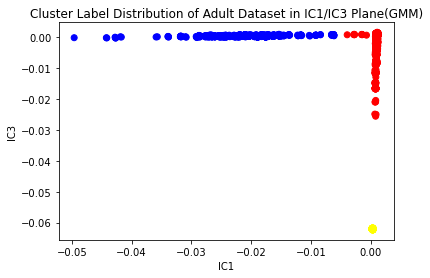

In [93]:
ica = decomposition.FastICA(n_components=None,random_state=42)
ica.fit(X_adult_num)
X = ica.transform(X_adult_num)
gmm = mixture.GaussianMixture(n_components=3,covariance_type='full',max_iter=10000,tol=0.001,random_state=42,)
X = X[:,[1,3]]
gmm.fit(X)
c_label =gmm.predict(X)
fig = plt.figure()
ax = fig.add_subplot()
#colors = ['red','green','blue','purple','yellow']
colors = ['red','green','blue','purple','yellow']

#c_label = pca.predict(X)
#ax.
ax.scatter(X[:,0], X[:,1],c=c_label,cmap=matplotlib.colors.ListedColormap(colors))
#print(matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('IC1')
ax.set_ylabel('IC3')
#ax.set_zlabel('PC4')
ax.set_title('Cluster Label Distribution of Adult Dataset in IC1/IC3 Plane(GMM)')
#plt.savefig('Figure_22.png')

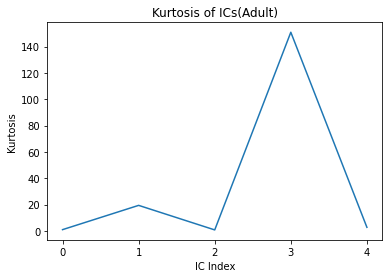

In [73]:
from scipy.stats import kurtosis
X_kurtosis = kurtosis(X,axis=0)
plt.plot(X_kurtosis)
plt.xticks([0,1,2,3,4])
plt.ylabel('Kurtosis')
plt.xlabel('IC Index')
plt.title('Kurtosis of ICs(Adult)')
plt.savefig('Figure_20.png')

/home/sun/miniconda3/envs/playground/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
/home/sun/miniconda3/envs/playground/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


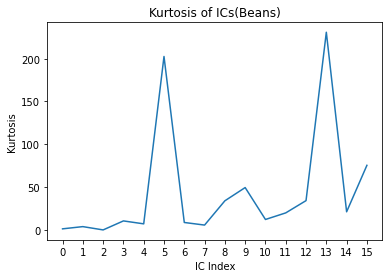

In [110]:
ica = decomposition.FastICA(n_components=None,random_state=42)
ica.fit(X_bean)
X = ica.transform(X_bean)
from scipy.stats import kurtosis
X_kurtosis = kurtosis(X,axis=0)
plt.plot(X_kurtosis)
plt.xticks(range(16))
plt.ylabel('Kurtosis')
plt.xlabel('IC Index')
plt.title('Kurtosis of ICs(Beans)')
plt.savefig('Figure_23.png')

In [98]:
import matplotlib
codes, uniques = pd.factorize(y_bean)

/home/sun/miniconda3/envs/playground/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
/home/sun/miniconda3/envs/playground/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Text(0.5, 1.0, 'Label Distribution of Beans Dataset in IC5/IC13/IC15 Space')

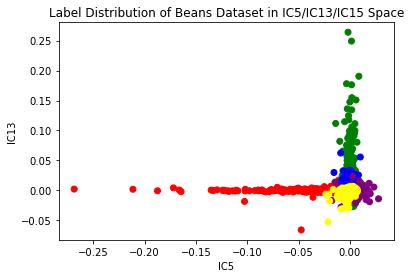

In [125]:
ica = decomposition.FastICA(n_components=None,random_state=42)
ica.fit(X_bean)
X = ica.transform(X_bean)
gmm = mixture.GaussianMixture(n_components=3,covariance_type='full',max_iter=10000,tol=0.001,random_state=42,)
#X = X[:,[1,3]]
gmm.fit(X)
c_label =gmm.predict(X)
fig = plt.figure()
ax = fig.add_subplot()#(projection='3d')
#colors = ['red','green','blue','purple','yellow']
colors = ['red','green','blue','purple','yellow']

#c_label = pca.predict(X)
#ax.
ax.scatter(X[:,5], X[:,13],c=codes,cmap=matplotlib.colors.ListedColormap(colors))
#print(matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('IC5')
ax.set_ylabel('IC13')
#ax.set_zlabel('IC15')
ax.set_title('Label Distribution of Beans Dataset in IC5/IC13/IC15 Space')
#plt.savefig('Figure_24.png')

/home/sun/miniconda3/envs/playground/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
/home/sun/miniconda3/envs/playground/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Text(0.5, 1.0, 'Cluster Label Distribution of Beans Dataset(Kmeans)')

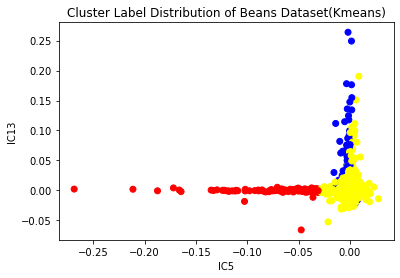

In [120]:
ica = decomposition.FastICA(n_components=None,random_state=42)
ica.fit(X_bean)
X = ica.transform(X_bean)
kmeans = KMeans(n_clusters=3,init='k-means++',)

#gmm = mixture.GaussianMixture(n_components=3,covariance_type='full',max_iter=10000,tol=0.001,random_state=42,)
X = X[:,[5,13,15]]
#gmm.fit(X)
kmeans.fit(X)
c_label =kmeans.predict(X)
fig = plt.figure()
ax = fig.add_subplot()#(projection='3d')
#colors = ['red','green','blue','purple','yellow']
colors = ['red','green','blue','purple','yellow']

#c_label = pca.predict(X)
#ax.
ax.scatter(X[:,0], X[:,1],c=c_label,cmap=matplotlib.colors.ListedColormap(colors))
#print(matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('IC5')
ax.set_ylabel('IC13')
#ax.set_zlabel('IC15')
ax.set_title('Cluster Label Distribution of Beans Dataset(Kmeans)')
#plt.savefig('Figure_24.png')

/home/sun/miniconda3/envs/playground/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
/home/sun/miniconda3/envs/playground/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


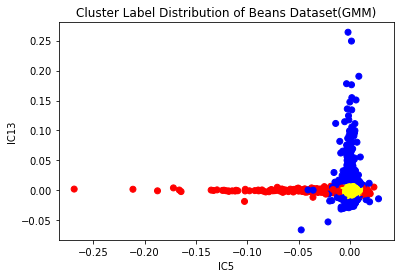

In [157]:
ica = decomposition.FastICA(n_components=None,random_state=42)
ica.fit(X_bean)
X = ica.transform(X_bean)
#kmeans = KMeans(n_clusters=3,init='k-means++',)

gmm = mixture.GaussianMixture(n_components=3,covariance_type='full',max_iter=10000,tol=0.001,random_state=42,)
X = X[:,[5,13,15]]
gmm.fit(X)
#kmeans.fit(X)
c_label =gmm.predict(X)
fig = plt.figure()
ax = fig.add_subplot()#projection='3d')
#colors = ['red','green','blue','purple','yellow']
colors = ['red','green','blue','purple','yellow']

#c_label = pca.predict(X)
#ax.
ax.scatter(X[:,0], X[:,1],c=c_label,cmap=matplotlib.colors.ListedColormap(colors))
#print(matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('IC5')
ax.set_ylabel('IC13')
#ax.set_zlabel('IC15')
ax.set_title('Cluster Label Distribution of Beans Dataset(GMM)')
plt.savefig('Figure_25.png')

In [141]:
import numpy as np
from sklearn.random_projection import GaussianRandomProjection

transformer = GaussianRandomProjection(random_state=42,n_components=3)
X_new = transformer.fit_transform(X_bean)
X_inverse = transformer.inverse_transform(X_new)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

r2 = r2_score(X_bean,X_inverse)
rmse = sqrt(mean_squared_error(X_bean,X_inverse))
rmse
# RMSE normalised by mean:
#nrmse = rmse/sqrt(np.mean(X_bean**2))

0.820217019068751

In [140]:
import numpy as np
from sklearn.random_projection import GaussianRandomProjection

transformer = GaussianRandomProjection(random_state=42*42,n_components=3)
X_new = transformer.fit_transform(X_bean)
X_inverse = transformer.inverse_transform(X_new)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

r2 = r2_score(X_bean,X_inverse)
rmse = sqrt(mean_squared_error(X_bean,X_inverse))
rmse

0.857260622111062

In [142]:
import numpy as np
from sklearn.random_projection import GaussianRandomProjection

transformer = GaussianRandomProjection(random_state=42*42*42,n_components=3)
X_new = transformer.fit_transform(X_bean)
X_inverse = transformer.inverse_transform(X_new)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

r2 = r2_score(X_bean,X_inverse)
rmse = sqrt(mean_squared_error(X_bean,X_inverse))
rmse

0.8887630758638835

In [143]:
import numpy as np
from sklearn.random_projection import GaussianRandomProjection

transformer = GaussianRandomProjection(random_state=42*42*42*42,n_components=3)
X_new = transformer.fit_transform(X_bean)
X_inverse = transformer.inverse_transform(X_new)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

r2 = r2_score(X_bean,X_inverse)
rmse = sqrt(mean_squared_error(X_bean,X_inverse))
rmse

0.9406586317058551

In [144]:
import numpy as np
from sklearn.random_projection import GaussianRandomProjection

transformer = GaussianRandomProjection(random_state=42*42*42*42*42,n_components=3)
X_new = transformer.fit_transform(X_bean)
X_inverse = transformer.inverse_transform(X_new)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

r2 = r2_score(X_bean,X_inverse)
rmse = sqrt(mean_squared_error(X_bean,X_inverse))
rmse

0.9549953732829604

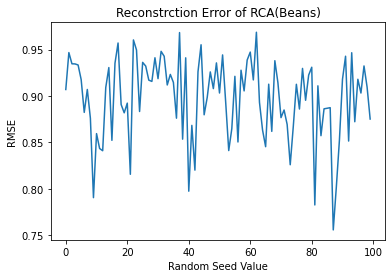

In [159]:
import numpy as np
from sklearn.random_projection import GaussianRandomProjection
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_list = []
for i in range(100):
    transformer = GaussianRandomProjection(random_state=i,n_components=3)
    X_new = transformer.fit_transform(X_bean)
    X_inverse = transformer.inverse_transform(X_new)

    #r2 = r2_score(X_bean,X_inverse)
    rmse = sqrt(mean_squared_error(X_bean,X_inverse))
    rmse_list.append(rmse)
plt.plot(range(100),rmse_list)
plt.ylabel('RMSE')
plt.xlabel('Random Seed Value')
plt.title('Reconstrction Error of RCA(Beans)')
plt.savefig('Figure_26.png')


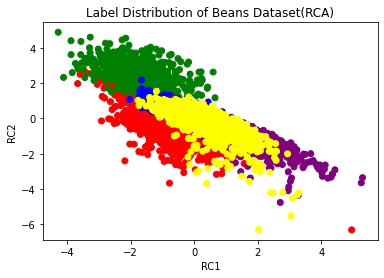

In [162]:
import numpy as np
from sklearn.random_projection import GaussianRandomProjection

transformer = GaussianRandomProjection(random_state=37,n_components=3)
X_new = transformer.fit_transform(X_bean)
fig = plt.figure()
ax = fig.add_subplot()#projection='3d')
#colors = ['red','green','blue','purple','yellow']
colors = ['red','green','blue','purple','yellow']

#c_label = pca.predict(X)
#ax.
ax.scatter(X_new[:,0], X_new[:,1],c=codes,cmap=matplotlib.colors.ListedColormap(colors))
#print(matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('RC1')
ax.set_ylabel('RC2')
#ax.set_zlabel('RC3')
ax.set_title('Label Distribution of Beans Dataset(RCA)')
plt.savefig('Figure_27.png')

In [166]:
K=range(2,20)
bic = []
s_score_list = []
cv_types = ["spherical", "tied", "diag", "full"]

for i in K:
    gmm = mixture.GaussianMixture(n_components=i,covariance_type='full',max_iter=10000,tol=0.001,random_state=42,)
    gmm.fit(X_new)
    c_label =gmm.predict(X_new)
    #print(c_label)
    silhouette_avg = silhouette_score(X_new,c_label)
    bic.append(gmm.bic(X_new))
    s_score_list.append(silhouette_avg)

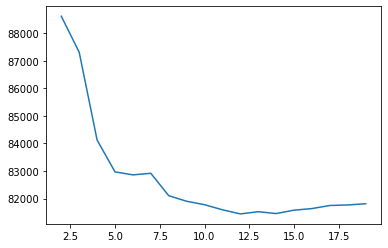

In [167]:
plt.plot(K,bic)

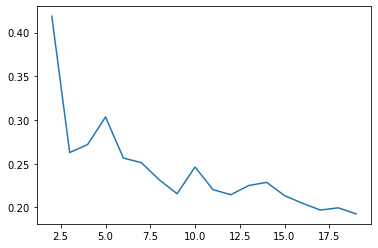

In [168]:
plt.plot(K,s_score_list)

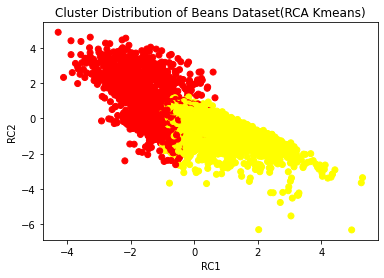

In [170]:
import numpy as np
from sklearn.random_projection import GaussianRandomProjection

transformer = GaussianRandomProjection(random_state=37,n_components=3)
X_new = transformer.fit_transform(X_bean)
kmeans = KMeans(n_clusters=2,init='k-means++',)
kmeans.fit(X_new)
c_label = kmeans.predict(X_new)
fig = plt.figure()
ax = fig.add_subplot()#projection='3d')
#colors = ['red','green','blue','purple','yellow']
colors = ['red','green','blue','purple','yellow']

#c_label = pca.predict(X)
#ax.
ax.scatter(X_new[:,0], X_new[:,1],c=c_label,cmap=matplotlib.colors.ListedColormap(colors))
#print(matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('RC1')
ax.set_ylabel('RC2')
#ax.set_zlabel('RC3')
ax.set_title('Cluster Distribution of Beans Dataset(RCA Kmeans)')
plt.savefig('Figure_28.png')

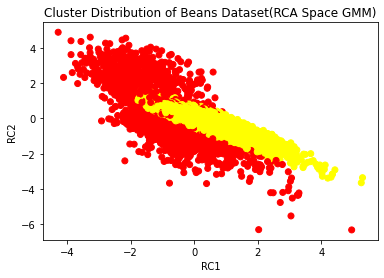

In [172]:
import numpy as np
from sklearn.random_projection import GaussianRandomProjection

transformer = GaussianRandomProjection(random_state=37,n_components=3)
X_new = transformer.fit_transform(X_bean)
gmm = mixture.GaussianMixture(n_components=2,covariance_type='full',max_iter=10000,tol=0.001,random_state=42,)
gmm.fit(X_new)
c_label = gmm.predict(X_new)
fig = plt.figure()
ax = fig.add_subplot()#projection='3d')
#colors = ['red','green','blue','purple','yellow']
colors = ['red','green','blue','purple','yellow']

#c_label = pca.predict(X)
#ax.
ax.scatter(X_new[:,0], X_new[:,1],c=c_label,cmap=matplotlib.colors.ListedColormap(colors))
#print(matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('RC1')
ax.set_ylabel('RC2')
#ax.set_zlabel('RC3')
ax.set_title('Cluster Distribution of Beans Dataset(RCA Space GMM)')
plt.savefig('Figure_28.png')

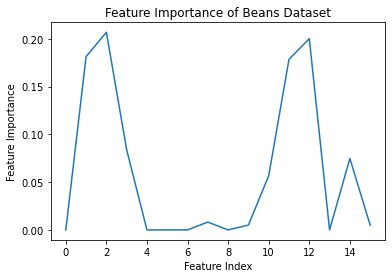

In [177]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,ccp_alpha=0.0013238942,criterion='gini')
clf.fit(X_bean, y_bean)

plt.plot(clf.feature_importances_)
plt.ylabel('Feature Importance')
plt.xlabel('Feature Index')
plt.title('Feature Importance of Beans Dataset')
plt.savefig('Figure_29.png')
#plt.xticks(range(16),list(X_bean))

In [174]:
print(list(X_bean))

['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']


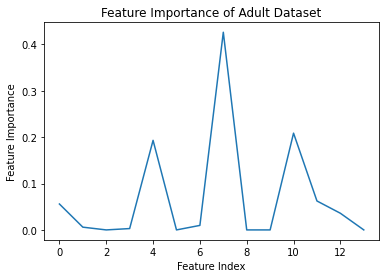

In [178]:
clf = DecisionTreeClassifier(random_state=0,ccp_alpha=0.00035716996937863125,criterion='entropy')
clf.fit(X_adult, y_adult)

plt.plot(clf.feature_importances_)
plt.ylabel('Feature Importance')
plt.xlabel('Feature Index')
plt.title('Feature Importance of Adult Dataset')
plt.savefig('Figure_30.png')

In [6]:
X_pca = X_adult_cat.copy().assign(PC0 = X_pca[:,0],PC1 = X_pca[:,1],PC3 = X_pca[:,2])

In [19]:
from sklearn import decomposition
scaler = StandardScaler()
#adult_df[num_label] = scaler.fit_transform(adult_df[num_label] )
pca = decomposition.PCA(n_components=3)
pca.fit(X_adult_num)
X_pca = pca.transform(X_adult_num)
X_pca = X_adult_cat.copy().assign(PC0 = X_pca[:,0],PC1 = X_pca[:,1],PC3 = X_pca[:,2])
X_pca = scaler.fit_transform(X_pca)
ica = decomposition.FastICA(n_components=3)
ica.fit(X_adult_num)
X_ica = ica.transform(X_adult_num)
X_ica = X_adult_cat.copy().assign(PC0 = X_ica[:,0],PC1 = X_ica[:,1],PC3 = X_ica[:,2])
X_ica= scaler.fit_transform(X_ica)


rca = GaussianRandomProjection(random_state=37,n_components=3)
rca.fit(X_adult_num)
X_rca = rca.transform(X_adult_num)
X_rca = X_adult_cat.copy().assign(PC0 = X_rca[:,0],PC1 = X_rca[:,1],PC3 = X_rca[:,2])
X_rca= scaler.fit_transform(X_rca)

codes, uniques = pd.factorize(y_adult)
#X_train_adult, X_test_adult, y_train_adult, y_test_adult = train_test_split(X_pca, y_adult, test_size=0.2, random_state=33)



/home/sun/miniconda3/envs/playground/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


In [ ]:
(6,6,) LR0.01, ADaptive alpha 0.0001

In [6]:
from sklearn.neural_network import MLPClassifier
X_train_adult, X_test_adult, y_train_adult, y_test_adult = train_test_split(X_pca, codes, test_size=0.2, random_state=33)
parameter_space = {
    'hidden_layer_sizes': [(4),(6),(8),(6,6),(8,8),(4,4),(4,8),(8,8),(16,16),],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001,0.001,0.01,0.1],
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.1,0.001,0.01,0.0001,0.00001],
}

from sklearn.model_selection import GridSearchCV
#f1_scorer = make_scorer(f1_score(sample_weight='weighted'))
mlp = MLPClassifier(early_stopping=True,max_iter=2000,random_state=42)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3,scoring='f1_weighted')
clf.fit(X_train_adult, y_train_adult)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'adam'}
0.802 (+/-0.008) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'solver': 'adam'}
0.783 (+/-0.022) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'adam'}
0.798 (+/-0.004) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'adam'}
0.645 (+/-0.000) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0001, 'solver': 'adam'}
0.645 (+/-0.000) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 1e-05, 'solver': 'adam'}
0.799 (+/-0.007) for {'act

In [5]:
from sklearn.neural_network import MLPClassifier
X_train_adult, X_test_adult, y_train_adult, y_test_adult = train_test_split(X_ica, codes, test_size=0.2, random_state=33)
parameter_space = {
    'hidden_layer_sizes': [(4),(6),(8),(6,6),(8,8),(4,4),(4,8),(8,8),(16,16),],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001,0.001,0.01,0.1],
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.1,0.001,0.01,0.0001,0.00001],
}

from sklearn.model_selection import GridSearchCV
#f1_scorer = make_scorer(f1_score(sample_weight='weighted'))
mlp = MLPClassifier(early_stopping=True,max_iter=2000,random_state=42)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3,scoring='f1_weighted')
clf.fit(X_train_adult, y_train_adult)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (4, 8), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'adam'}
0.799 (+/-0.014) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'solver': 'adam'}
0.798 (+/-0.008) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'adam'}
0.803 (+/-0.008) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'adam'}
0.696 (+/-0.143) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0001, 'solver': 'adam'}
0.645 (+/-0.000) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 1e-05, 'solver': 'adam'}
0.805 (+/-0.004) for {'

In [7]:
from sklearn.neural_network import MLPClassifier
X_train_adult, X_test_adult, y_train_adult, y_test_adult = train_test_split(X_rca, codes, test_size=0.2, random_state=33)
parameter_space = {
    'hidden_layer_sizes': [(4),(6),(8),(6,6),(8,8),(4,4),(4,8),(8,8),(16,16),],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001,0.001,0.01,0.1],
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.1,0.001,0.01,0.0001,0.00001],
}

from sklearn.model_selection import GridSearchCV
#f1_scorer = make_scorer(f1_score(sample_weight='weighted'))
mlp = MLPClassifier(early_stopping=True,max_iter=2000,random_state=42,)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3,scoring='f1_weighted')
clf.fit(X_train_adult, y_train_adult)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (8, 8), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'solver': 'adam'}
0.800 (+/-0.017) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'solver': 'adam'}
0.787 (+/-0.024) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'adam'}
0.802 (+/-0.009) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'adam'}
0.645 (+/-0.000) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0001, 'solver': 'adam'}
0.645 (+/-0.000) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 1e-05, 'solver': 'adam'}
0.795 (+/-0.003) for {'act

In [ ]:
(8,8) 0.01 LR

In [9]:
X_adult_fil = X_adult.iloc[:,[0,4,7,10,11]].copy()
X_adult_fil = np.asarray(X_adult_fil)
from sklearn.neural_network import MLPClassifier
X_train_adult, X_test_adult, y_train_adult, y_test_adult = train_test_split(X_adult_fil, codes, test_size=0.2, random_state=33)
parameter_space = {
    'hidden_layer_sizes': [(4),(6),(8),(6,6),(8,8),(4,4),(4,8),(8,8),(16,16),],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001,0.001,0.01,0.1],
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.1,0.001,0.01,0.0001,0.00001],
}

from sklearn.model_selection import GridSearchCV
#f1_scorer = make_scorer(f1_score(sample_weight='weighted'))
mlp = MLPClassifier(early_stopping=True,max_iter=2000,random_state=42,)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3,scoring='f1_weighted')
clf.fit(X_train_adult, y_train_adult)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (16, 16), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'adam'}
0.822 (+/-0.011) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'solver': 'adam'}
0.813 (+/-0.019) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'adam'}
0.820 (+/-0.003) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'adam'}
0.707 (+/-0.005) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0001, 'solver': 'adam'}
0.730 (+/-0.031) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 1e-05, 'solver': 'adam'}
0.829 (+/-0.007) for {'a

In [11]:
X_adult_org = X_adult.copy()
#all_label.remove('50K')
X_adult_org  = scaler.fit_transform(X_adult_org)
X_adult_org = np.asarray(X_adult_org)

from sklearn.neural_network import MLPClassifier
X_train_adult, X_test_adult, y_train_adult, y_test_adult = train_test_split(X_adult_org, codes, test_size=0.2, random_state=33)
parameter_space = {
    'hidden_layer_sizes': [(4),(6),(8),(6,6),(8,8),(4,4),(4,8),(8,8),(16,16),],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001,0.001,0.01,0.1],
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.1,0.001,0.01,0.0001,0.00001],
}

from sklearn.model_selection import GridSearchCV
#f1_scorer = make_scorer(f1_score(sample_weight='weighted'))
mlp = MLPClassifier(early_stopping=True,max_iter=2000,random_state=42,)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3,scoring='f1_weighted')
clf.fit(X_train_adult, y_train_adult)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (16, 16), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'adam'}
0.830 (+/-0.004) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'solver': 'adam'}
0.835 (+/-0.009) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'adam'}
0.836 (+/-0.007) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'adam'}
0.818 (+/-0.009) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0001, 'solver': 'adam'}
0.670 (+/-0.002) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 1e-05, 'solver': 'adam'}
0.836 (+/-0.010) for {'

In [10]:
import matplotlib
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
codes, uniques = pd.factorize(y_adult)
X_adult_org = X_adult.copy()
#all_label.remove('50K')
X_adult_org  = scaler.fit_transform(X_adult_org)
X_adult_org = np.asarray(X_adult_org)
#'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (16, 16), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'adam'
X_train_adult, X_test_adult, y_train_adult, y_test_adult = train_test_split(X_adult_org, codes, test_size=0.2, random_state=33)
baseline_clf= MLPClassifier(hidden_layer_sizes=(16,16),learning_rate='adaptive',learning_rate_init=0.01,solver='adam',early_stopping=True,max_iter=2000,random_state=42,activation='relu',alpha=0.01,)
#baseline_clf.fit(X_train_adult,y_train_adult)
train_sizes_base, train_scores_base, test_scores_base, fit_times_base, _ = learning_curve(baseline_clf, X_train_adult, y_train_adult, cv=3,return_times=True,scoring='f1_weighted')


In [ ]:
baseline_clf= MLPClassifier(hidden_layer_sizes=(16,16),learning_rate='adaptive',learning_rate_init=0.01,solver='adam',early_stopping=True,max_iter=2000,random_state=42,activation='relu',alpha=0.01,)


In [20]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, codes, test_size=0.2, random_state=33)
pca_clf= MLPClassifier(hidden_layer_sizes=(6,6),learning_rate='adaptive',learning_rate_init=0.01,solver='adam',early_stopping=True,max_iter=2000,random_state=42,activation='relu',alpha=0.1,)
train_sizes_pca, train_scores_pca, test_scores_pca, fit_times_pca, _ = learning_curve(pca_clf, X_train_pca, y_train_pca, cv=3,return_times=True,scoring='f1_weighted')


In [27]:
X_train_rca, X_test_rca, y_train_rca, y_test_rca = train_test_split(X_rca, codes, test_size=0.2, random_state=33)
# {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (8, 8), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'solver': 'adam'}
rca_clf= MLPClassifier(hidden_layer_sizes=(8,8),learning_rate='adaptive',learning_rate_init=0.01,solver='adam',early_stopping=True,max_iter=2000,random_state=42,activation='relu',alpha=0.01,)
train_sizes_rca, train_scores_rca, test_scores_rca, fit_times_rca, _ = learning_curve(rca_clf, X_train_rca, y_train_rca, cv=3,return_times=True,scoring='f1_weighted')


In [30]:
X_train_ica, X_test_ica, y_train_ica, y_test_ica = train_test_split(X_ica, codes, test_size=0.2, random_state=33)
# {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (4, 8), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'adam'}
ica_clf= MLPClassifier(hidden_layer_sizes=(4,8),learning_rate='adaptive',learning_rate_init=0.01,solver='adam',early_stopping=True,max_iter=2000,random_state=42,activation='relu',alpha=0.0001,)
train_sizes_ica, train_scores_ica, test_scores_ica, fit_times_ica, _ = learning_curve(ica_clf, X_train_ica, y_train_ica, cv=3,return_times=True,scoring='f1_weighted')


In [35]:
X_adult_fil = X_adult.iloc[:,[0,4,7,10,11]].copy()
X_adult_fil = np.asarray(X_adult_fil)
X_train_fil, X_test_fil, y_train_fil, y_test_fil = train_test_split(X_adult_fil, codes, test_size=0.2, random_state=33)
#0.835 (+/-0.002) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 8), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'solver': 'adam'}
fil_clf= MLPClassifier(hidden_layer_sizes=(8,8),learning_rate='adaptive',learning_rate_init=0.01,solver='adam',early_stopping=True,max_iter=2000,random_state=42,activation='relu',alpha=0.0001,)
train_sizes_fil, train_scores_fil, test_scores_fil, fit_times_fil, _ = learning_curve(fil_clf, X_train_fil, y_train_fil, cv=3,return_times=True,scoring='f1_weighted')
baseline_clf= MLPClassifier(hidden_layer_sizes=(16,16),learning_rate='adaptive',learning_rate_init=0.01,solver='adam',early_stopping=True,max_iter=2000,random_state=42,activation='relu',alpha=0.01,)


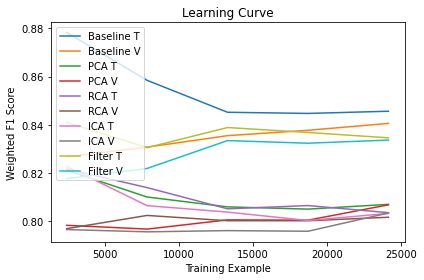

In [50]:
plt.plot(train_sizes_base,np.mean(train_scores_base,axis=1),label='Baseline T')
plt.plot(train_sizes_base,np.mean(test_scores_base,axis=1),label='Baseline V')
plt.plot(train_sizes_pca,np.mean(train_scores_pca,axis=1),label='PCA T')
plt.plot(train_sizes_pca,np.mean(test_scores_pca,axis=1),label='PCA V')
plt.plot(train_sizes_rca,np.mean(train_scores_rca,axis=1),label='RCA T')
plt.plot(train_sizes_rca,np.mean(test_scores_rca,axis=1),label='RCA V')
plt.plot(train_sizes_ica,np.mean(train_scores_ica,axis=1),label='ICA T')
plt.plot(train_sizes_ica,np.mean(test_scores_ica,axis=1),label='ICA V')
plt.plot(train_sizes_fil,np.mean(train_scores_fil,axis=1),label='Filter T')
plt.plot(train_sizes_fil,np.mean(test_scores_fil,axis=1),label='Filter V')
plt.legend(loc='upper left')
plt.title('Learning Curve')
plt.xlabel('Training Example')
plt.ylabel('Weighted F1 Score')
plt.tight_layout()
plt.savefig('Figure_31.png')

In [60]:
import time
start_time = time.time()
baseline_clf.fit(X_train_adult, y_train_adult)
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
ica_clf.fit(X_train_ica,y_train_ica)
print("--- %s seconds ---ICA" % (time.time() - start_time))

start_time = time.time()

rca_clf.fit(X_train_rca,y_train_rca)
print("--- %s seconds ---RCA" % (time.time() - start_time))

start_time = time.time()

pca_clf.fit(X_train_pca,y_train_pca)
print("--- %s seconds ---PCA" % (time.time() - start_time))

start_time = time.time()

fil_clf.fit(X_train_fil,y_train_fil)
print("--- %s seconds ---FIl" % (time.time() - start_time))



--- 2.172797203063965 seconds ---
--- 1.0571753978729248 seconds ---ICA
--- 1.190901756286621 seconds ---RCA
--- 0.667431116104126 seconds ---PCA
--- 2.0489494800567627 seconds ---FIl


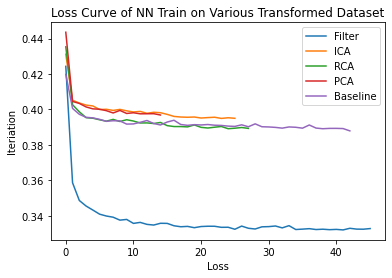

In [48]:
#baseline_clf.fit(X_train_adult, y_train_adult)
#ica_clf.fit(X_train_ica,y_train_ica)
#rca_clf.fit(X_train_rca,y_train_rca)
#pca_clf.fit(X_train_pca,y_train_pca)
#fil_clf.fit(X_train_fil,y_train_fil)

plt.plot(fil_clf.loss_curve_,label='Filter')
plt.plot(ica_clf.loss_curve_,label='ICA')
plt.plot(rca_clf.loss_curve_,label='RCA')
plt.plot(pca_clf.loss_curve_,label='PCA')
plt.plot(baseline_clf.loss_curve_,label='Baseline')
plt.legend()
plt.title("Loss Curve of NN Train on Various Transformed Dataset")
plt.ylabel('Iteriation')
plt.xlabel('Loss')
plt.savefig('Figure_32.png')

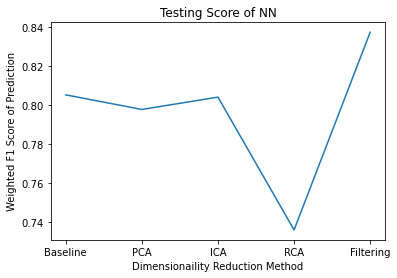

In [59]:
pred_baseline=baseline_clf.predict(X_test_adult)
pred_pca=pca_clf.predict(X_test_pca)
pred_ica=ica_clf.predict(X_test_ica)
pred_rca=pca_clf.predict(X_test_rca)
pred_fil=fil_clf.predict(X_test_fil)
test_score = []
test_score.append(f1_score(y_test_adult,pred_baseline,average='weighted'))
test_score.append(f1_score(y_test_pca,pred_pca,average='weighted'))
test_score.append(f1_score(y_test_ica,pred_ica,average='weighted'))
test_score.append(f1_score(y_test_rca,pred_rca,average='weighted'))
test_score.append(f1_score(y_test_fil,pred_fil,average='weighted'))

plt.plot([0,1,2,3,4],test_score)
plt.xticks([0,1,2,3,4],['Baseline','PCA','ICA','RCA','Filtering'])
plt.title('Testing Score of NN')
plt.ylabel('Weighted F1 Score of Prediction')
plt.xlabel('Dimensionaility Reduction Method')
plt.savefig('Figure_33.png')



In [ ]:
X_adult_org = X_adult.copy()
#all_label.remove('50K')
X_adult_org  = scaler.fit_transform(X_adult_org)
X_adult_org = np.asarray(X_adult_org)

from sklearn.neural_network import MLPClassifier
X_train_adult, X_test_adult, y_train_adult, y_test_adult = train_test_split(X_adult_org, codes, test_size=0.2, random_state=33)
parameter_space = {
    'hidden_layer_sizes': [(4),(6),(8),(6,6),(8,8),(4,4),(4,8),(8,8),(16,16),],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001,0.001,0.01,0.1],
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.1,0.001,0.01,0.0001,0.00001],
}

from sklearn.model_selection import GridSearchCV
#f1_scorer = make_scorer(f1_score(sample_weight='weighted'))
mlp = MLPClassifier(early_stopping=True,max_iter=2000,random_state=42,)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3,scoring='f1_weighted')
clf.fit(X_train_adult, y_train_adult)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [77]:
X_train_adult, X_test_adult, y_train_adult, y_test_adult = train_test_split(X_adult, codes, test_size=0.2, random_state=33)
catColumnsPos = [X_adult.columns.get_loc(col) for col in adult_label_col]

In [66]:
catColumnsPos = [X_adult.columns.get_loc(col) for col in adult_label_col]
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 42)
kprototype.fit_predict(X_train_adult, categorical = catColumnsPos)
#k_label=kprototype.predict

array([2, 1, 0, ..., 2, 1, 2], dtype=uint16)

In [78]:
k_label=kprototype.predict(X_train_adult,categorical = catColumnsPos)
test_k_label = kprototype.predict(X_test_adult,categorical = catColumnsPos)
X_train_adult['label'] = k_label
X_test_adult['label'] = test_k_label

X_train_adult_k = scaler.fit_transform(X_train_adult)
X_train_adult_k = np.asarray(X_train_adult_k)
X_test_adult_k = scaler.fit_transform(X_test_adult)
X_test_adult_k = np.asarray(X_test_adult_k)

In [79]:
####tuning Kprototpye cluster label
parameter_space = {
    'hidden_layer_sizes': [(4),(6),(8),(6,6),(8,8),(4,4),(4,8),(8,8),(16,16),],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001,0.001,0.01,0.1],
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.1,0.001,0.01,0.0001,0.00001],
}

from sklearn.model_selection import GridSearchCV
#f1_scorer = make_scorer(f1_score(sample_weight='weighted'))
mlp = MLPClassifier(early_stopping=True,max_iter=2000,random_state=42,)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3,scoring='f1_weighted')
clf.fit(X_train_adult_k, y_train_adult)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (16, 16), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'adam'}
0.833 (+/-0.008) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'solver': 'adam'}
0.823 (+/-0.005) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'adam'}
0.835 (+/-0.012) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'adam'}
0.807 (+/-0.010) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0001, 'solver': 'adam'}
0.725 (+/-0.053) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 1e-05, 'solver': 'adam'}
0.834 (+/-0.003) for {'

In [80]:
X_adult_org = X_adult.copy()
#all_label.remove('50K')
X_adult_org  = scaler.fit_transform(X_adult_org)
X_adult_org = np.asarray(X_adult_org)

from sklearn.neural_network import MLPClassifier
X_train_adult, X_test_adult, y_train_adult, y_test_adult = train_test_split(X_adult_org, codes, test_size=0.2, random_state=33)
parameter_space = {
    'hidden_layer_sizes': [(4),(6),(8),(6,6),(8,8),(4,4),(4,8),(8,8),(16,16),],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001,0.001,0.01,0.1],
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.1,0.001,0.01,0.0001,0.00001],
}

from sklearn.model_selection import GridSearchCV
#f1_scorer = make_scorer(f1_score(sample_weight='weighted'))
mlp = MLPClassifier(early_stopping=True,max_iter=2000,random_state=42,)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3,scoring='f1_weighted')
clf.fit(X_train_adult, y_train_adult)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (16, 16), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'adam'}
0.830 (+/-0.004) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'solver': 'adam'}
0.835 (+/-0.009) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'adam'}
0.836 (+/-0.007) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'adam'}
0.818 (+/-0.009) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0001, 'solver': 'adam'}
0.670 (+/-0.002) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 1e-05, 'solver': 'adam'}
0.836 (+/-0.010) for {'

In [82]:
X_train_adult, X_test_adult, y_train_adult, y_test_adult = train_test_split(X_adult, codes, test_size=0.2, random_state=33)
gmm = mixture.GaussianMixture(n_components=6,covariance_type='full',max_iter=10000,tol=0.001,random_state=42,)
gmm.fit(X_train_adult)
g_label = gmm.predict(X_train_adult)
g_test_label = gmm.predict(X_test_adult)
X_train_adult['label'] = g_label
X_test_adult['label'] = g_test_label


X_train_adult_g = scaler.fit_transform(X_train_adult)
X_train_adult_g = np.asarray(X_train_adult_g)
X_test_adult_g = scaler.fit_transform(X_test_adult)
X_test_adult_g = np.asarray(X_test_adult_g)

In [83]:
####tuning Kprototpye cluster label
parameter_space = {
    'hidden_layer_sizes': [(4),(6),(8),(6,6),(8,8),(4,4),(4,8),(8,8),(16,16),],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001,0.001,0.01,0.1],
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.1,0.001,0.01,0.0001,0.00001],
}

from sklearn.model_selection import GridSearchCV
#f1_scorer = make_scorer(f1_score(sample_weight='weighted'))
mlp = MLPClassifier(early_stopping=True,max_iter=2000,random_state=42,)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3,scoring='f1_weighted')
clf.fit(X_train_adult_g, y_train_adult)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (16, 16), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'adam'}
0.834 (+/-0.003) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'solver': 'adam'}
0.827 (+/-0.014) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'solver': 'adam'}
0.836 (+/-0.008) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'adam'}
0.798 (+/-0.052) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0001, 'solver': 'adam'}
0.720 (+/-0.077) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'learning_rate_init': 1e-05, 'solver': 'adam'}
0.831 (+/-0.004) for {'

In [100]:
X_train_adult, X_test_adult, y_train_adult_k, y_test_adult_k = train_test_split(X_adult, codes, test_size=0.2, random_state=33)
k_label=kprototype.predict(X_train_adult,categorical = catColumnsPos)
test_k_label = kprototype.predict(X_test_adult,categorical = catColumnsPos)
X_train_adult['label'] = k_label
X_test_adult['label'] = test_k_label

X_train_adult_k = scaler.fit_transform(X_train_adult)
X_train_adult_k = np.asarray(X_train_adult_k)
X_test_adult_k = scaler.fit_transform(X_test_adult)
X_test_adult_k = np.asarray(X_test_adult_k)

X_train_adult, X_test_adult, y_train_adult_g, y_test_adult_g = train_test_split(X_adult, codes, test_size=0.2, random_state=33)
gmm = mixture.GaussianMixture(n_components=6,covariance_type='full',max_iter=10000,tol=0.001,random_state=42,)
gmm.fit(X_train_adult)
g_label = gmm.predict(X_train_adult)
g_test_label = gmm.predict(X_test_adult)
X_train_adult['label'] = g_label
X_test_adult['label'] = g_test_label


X_train_adult_g = scaler.fit_transform(X_train_adult)
X_train_adult_g = np.asarray(X_train_adult_g)
X_test_adult_g = scaler.fit_transform(X_test_adult)
X_test_adult_g = np.asarray(X_test_adult_g)

X_train_adult, X_test_adult, y_train_adult, y_test_adult = train_test_split(X_adult, codes, test_size=0.2, random_state=33)
X_train_adult = scaler.fit_transform(X_train_adult)

X_train_adult = np.asarray(X_train_adult)
X_test_adult = scaler.fit_transform(X_test_adult)

X_test_adult = np.asarray(X_test_adult)

In [94]:
k_clf= MLPClassifier(hidden_layer_sizes=(16,16),learning_rate='adaptive',learning_rate_init=0.01,solver='adam',early_stopping=True,max_iter=2000,random_state=42,activation='relu',alpha=0.01,)
g_clf= MLPClassifier(hidden_layer_sizes=(16,16),learning_rate='adaptive',learning_rate_init=0.01,solver='adam',early_stopping=True,max_iter=2000,random_state=42,activation='relu',alpha=0.01,)
org_clf= MLPClassifier(hidden_layer_sizes=(16,16),learning_rate='adaptive',learning_rate_init=0.01,solver='adam',early_stopping=True,max_iter=2000,random_state=42,activation='relu',alpha=0.01,)
train_sizes_base, train_scores_base, test_scores_base, fit_times_base, _ = learning_curve(org_clf, X_train_adult, y_train_adult, cv=3,return_times=True,scoring='f1_weighted')
train_sizes_k, train_scores_k, test_scores_k, fit_times_k, _ = learning_curve(k_clf, X_train_adult_k, y_train_adult_k, cv=3,return_times=True,scoring='f1_weighted')
train_sizes_g, train_scores_g, test_scores_g, fit_times_g, _ = learning_curve(g_clf, X_train_adult_g, y_train_adult_g, cv=3,return_times=True,scoring='f1_weighted')
#train_sizes_k, train_scores_k, test_scores_k, fit_times_k, _ = learning_curve(k_clf, X_train_adult_k, y_train_adult_k, cv=3,return_times=True,scoring='f1_weighted')


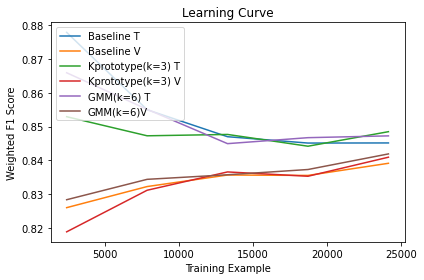

In [96]:
plt.plot(train_sizes_base,np.mean(train_scores_base,axis=1),label='Baseline T')
plt.plot(train_sizes_base,np.mean(test_scores_base,axis=1),label='Baseline V')
plt.plot(train_sizes_k,np.mean(train_scores_k,axis=1),label='Kprototype(k=3) T')
plt.plot(train_sizes_k,np.mean(test_scores_k,axis=1),label='Kprototype(k=3) V')
plt.plot(train_sizes_g,np.mean(train_scores_g,axis=1),label='GMM(k=6) T')
plt.plot(train_sizes_g,np.mean(test_scores_g,axis=1),label='GMM(k=6)V')
plt.legend(loc='upper left')
plt.title('Learning Curve')
plt.xlabel('Training Example')
plt.ylabel('Weighted F1 Score')
#plt.yscale('log')
plt.tight_layout()
plt.savefig('Figure_34.png')

In [102]:
org_clf.fit(X_train_adult,y_train_adult)
k_clf.fit(X_train_adult_k,y_train_adult_k)
g_clf.fit(X_train_adult_g,y_train_adult_g)


MLPClassifier(alpha=0.01, early_stopping=True, hidden_layer_sizes=(16, 16),
              learning_rate='adaptive', learning_rate_init=0.01, max_iter=2000,
              random_state=42)

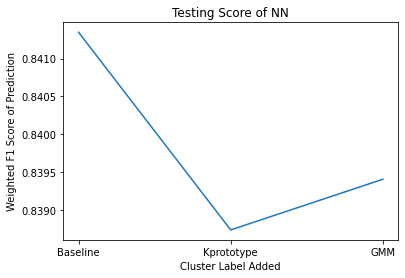

In [104]:
pred_baseline=org_clf.predict(X_test_adult)
pred_k=k_clf.predict(X_test_adult_k)
pred_g=g_clf.predict(X_test_adult_g)
test_score = []
test_score.append(f1_score(y_test_adult,pred_baseline,average='weighted'))
test_score.append(f1_score(y_test_adult_k,pred_k,average='weighted'))
test_score.append(f1_score(y_test_adult_g,pred_g,average='weighted'))

plt.plot([0,1,2],test_score)
plt.xticks([0,1,2],['Baseline','Kprototype','GMM'])
plt.title('Testing Score of NN')
plt.ylabel('Weighted F1 Score of Prediction')
plt.xlabel('Cluster Label Added')
plt.savefig('Figure_35.png')